https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/04_supervised_in_depth.ipynb
04_supervised_in_depth.ipynb

Supervised Learning In-Depth: SVMs and Random Forests Machine Learning Algorithms
- Understand how decision trees work
- Understand how multiple decision trees are combined into Random Forests

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Support Vector Machines
- Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. 
    - SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data.

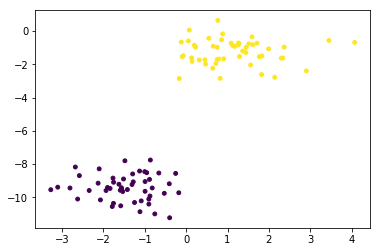

In [2]:
from sklearn.datasets.samples_generator import make_blobs
observations, target = make_blobs(n_samples = 100, centers = 2,
                  random_state = 2, cluster_std = 0.75) # cluster_std ~ Determines How Far Apart The Points Are
plt.scatter(observations[:, 0], observations[:, 1], c = target, s = 15); # s = Size Of Points, c = Color Of Targets

In [3]:
# Fit Support Vector Machine Classifier To The Points
from sklearn.svm import SVC 
clf = SVC(kernel = 'linear')
clf.fit(observations, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return plt.contour(X, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

NameError: name 'X' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,n_features = 2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

# Random Forests
Random Forests Are An Example Of Ensemble Learner (Supervised Learning) Built On Decision Trees

# Decision Trees

Decision Trees Encodes A Series Of Binary Choices Breaking Off Of A Single Question As Binary To Classify Things. The Binary Splitting Of Questions Is The Essence Of A Decision Tree. Example: Creating A Guide To Identify An Animal Found In Nature, We'D Ask The Following Questions:
    - Is The Animal Big Or Small?
        - If Big: Does The Animal Have Wings Or No Wings?
            - If Wings: Does It Live In A Cave?
            - If No Wings: Does It Hunt At Night?
        - If Small: Does The Animal Have Fur:
            - If Fur: Does It Hop?
            - If No Fur: Does It Breed Eggs?

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets.samples_generator import make_blobs

'KL: Creating Plot With 7 Clusters, High Standard Deviation Sets Them Farther Apart The Higher The Standard Deviation. s Parameter Sets The Size Of The Points'

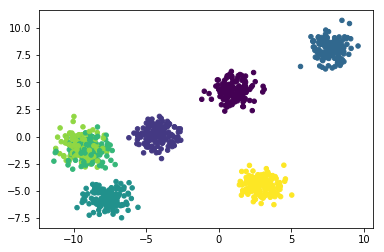

In [13]:
observations, target = make_blobs(n_samples=1000, centers=7,
                  random_state=3, cluster_std=0.75)
plt.scatter(observations[:, 0], observations[:, 1], c=target, s=20)
"""KL: Creating Plot With 7 Clusters, High Standard Deviation Sets Them Farther Apart The \
Higher The Standard Deviation. s Parameter Sets The Size Of The Points"""

In [14]:
def plot_estimator(estimator, observations, target):
    estimator.fit(observations, target)
    x_min, x_max = observations[:, 0].min() - .1, observations[:, 0].max() + .1
    y_min, y_max = observations[:, 1].min() - .1, observations[:, 1].max() + .1
    print(x_min, x_max)
    print(y_min, y_max)
    
    # Set xx And yy To The Minimum And Maximum Values Of X_Min, X_Max And Y_Min, Y_Max 
    # From Observations Values
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), # xx linspace
                         np.linspace(y_min, y_max, 50)) # yy linspace
    
    print(xx)
    print(yy)
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.3)

    # Plot also the training points
    plt.scatter(observations[:, 0], observations[:, 1], c=target, s=25)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

-11.4511426597 9.6875008714
-7.57487088007 10.8027054569
[[-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]
 [-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]
 [-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]
 ..., 
 [-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]
 [-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]
 [-11.45114266 -11.01974177 -10.58834088 ...,   8.82469909   9.25609998
    9.68750087]]
[[ -7.57487088  -7.57487088  -7.57487088 ...,  -7.57487088  -7.57487088
   -7.57487088]
 [ -7.1998183   -7.1998183   -7.1998183  ...,  -7.1998183   -7.1998183
   -7.1998183 ]
 [ -6.82476572  -6.82476572  -6.82476572 ...,  -6.82476572  -6.82476572
   -6.82476572]
 ..., 
 [ 10.0526003   10.0526003   10.0526003  ...,  10.0526003   10.0526003
   10.0526003 ]
 [ 10.42765288  10.42765288  10.42765288 ...,  10.

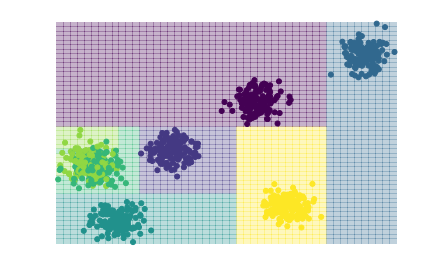

In [15]:
classifier = DecisionTreeClassifier(max_depth=10)
plot_estimator(classifier, observations, target)


# x_min, x_max = observations[:, 0].min() - .1, observations[:, 0].max() + .1
# y_min, y_max = observations[:, 1].min() - .1, observations[:, 1].max() + .1

# # Set xx And yy To The Minimum And Maximum Values Of X_Min, X_Max And Y_Min, Y_Max 
# # From Observations Values
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), # x 
#                          np.linspace(y_min, y_max, 50)) # y

#     # Put the result into a color plot
# print(x_min)
# print(y_min)


In [ ]:
print(xx)

In [ ]:
clf = DecisionTreeClassifier(max_depth=10)
plot_estimator(clf, observations, target)